In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')

In [157]:
data = pd.read_csv("vgsales.csv")
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [158]:
data.nunique()

Name               12080
Platform              31
Year_of_Release       42
Genre                 12
Publisher            627
NA_Sales             399
EU_Sales             306
JP_Sales             245
Other_Sales          157
Global_Sales         627
Critic_Score          82
Critic_Count         106
User_Score            95
User_Count           903
Rating                 8
dtype: int64

In [159]:
data.isnull().sum()

Name                  0
Platform              0
Year_of_Release       8
Genre                 0
Publisher             1
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       9080
Critic_Count       9080
User_Score         9618
User_Count         9618
Rating             7164
dtype: int64

In [160]:
data.dropna(inplace=True)

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7112 entries, 0 to 17407
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7112 non-null   object 
 1   Platform         7112 non-null   object 
 2   Year_of_Release  7112 non-null   float64
 3   Genre            7112 non-null   object 
 4   Publisher        7112 non-null   object 
 5   NA_Sales         7112 non-null   float64
 6   EU_Sales         7112 non-null   float64
 7   JP_Sales         7112 non-null   float64
 8   Other_Sales      7112 non-null   float64
 9   Global_Sales     7112 non-null   float64
 10  Critic_Score     7112 non-null   float64
 11  Critic_Count     7112 non-null   float64
 12  User_Score       7112 non-null   float64
 13  User_Count       7112 non-null   float64
 14  Rating           7112 non-null   object 
dtypes: float64(10), object(5)
memory usage: 889.0+ KB


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7112 entries, 0 to 17407
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7112 non-null   object 
 1   Platform         7112 non-null   object 
 2   Year_of_Release  7112 non-null   float64
 3   Genre            7112 non-null   object 
 4   Publisher        7112 non-null   object 
 5   NA_Sales         7112 non-null   float64
 6   EU_Sales         7112 non-null   float64
 7   JP_Sales         7112 non-null   float64
 8   Other_Sales      7112 non-null   float64
 9   Global_Sales     7112 non-null   float64
 10  Critic_Score     7112 non-null   float64
 11  Critic_Count     7112 non-null   float64
 12  User_Score       7112 non-null   float64
 13  User_Count       7112 non-null   float64
 14  Rating           7112 non-null   object 
dtypes: float64(10), object(5)
memory usage: 889.0+ KB


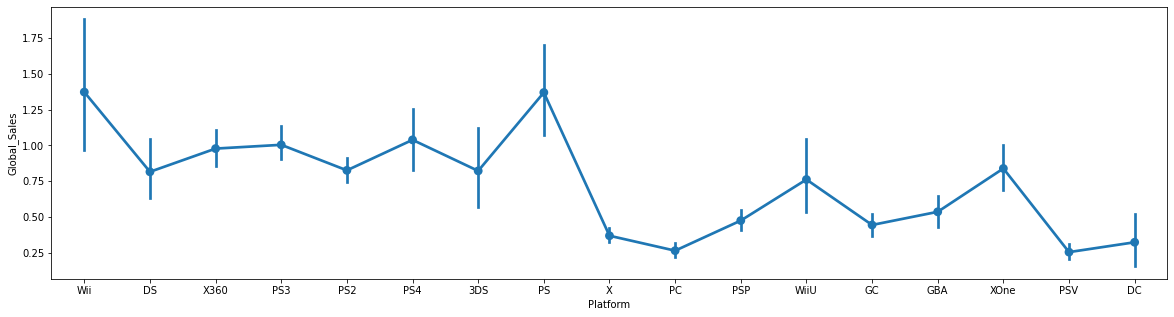

In [163]:
plt.figure(figsize=(20,5))
sns.pointplot(x='Platform',y='Global_Sales',data=data)

In [164]:
train, test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)

In [165]:
train=train.drop('Name',1)

In [166]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [167]:
import catboost as cat
cat_feat = ['Platform', 'Genre', 'Publisher','Rating']
features = list(set(train.columns)-set(['Global_Sales']))
target = 'Global_Sales'

In [168]:
model = cat.CatBoostRegressor(random_state=100,cat_features=cat_feat,verbose=0)
model.fit(train[features],train[target])

In [169]:
y_true= pd.DataFrame(data=test[target], columns=['Global_Sales'])

In [170]:
test_temp = test.drop(columns=[target])

In [171]:
y_pred = model.predict(test_temp[features])

In [172]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_true, y_pred))
print(rmse)

0.1891434073593349


In [173]:
import pickle
filename = 'game_model.sav'

In [174]:
pickle.dump(model, open(filename, 'wb'))

In [175]:
loaded_model = pickle.load(open(filename, 'rb'))

In [176]:
test_temp[features].head()

,Publisher,Critic_Score,JP_Sales,Critic_Count,User_Count,NA_Sales,Genre,Platform,Year_of_Release,User_Score,Other_Sales,Rating,EU_Sales
4474,D3Publisher,65.0,0.00,5.0,6.0,0.25,Action,Wii,2009.0,4.0,0.04,E10+,0.14
5855,Square Enix,63.0,0.02,4.0,5.0,0.26,Role-Playing,X360,2007.0,5.8,0.02,T,0.00
14060,Indie Games,60.0,0.00,22.0,9.0,0.02,Adventure,PS2,2004.0,8.9,0.00,T,0.01
5214,Vivendi Games,53.0,0.00,6.0,8.0,0.18,Action,PS2,2005.0,6.0,0.05,E,0.14
11856,Electronic Arts,33.0,0.00,8.0,13.0,0.07,Action,DS,2006.0,4.9,0.01,E,0.00


In [177]:
loaded_model.predict(test_temp[features].head()) # predicted the global sales in millions

array([0.418878  , 0.29469846, 0.0329329 , 0.37263873, 0.07977551])